In [1]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline



def ims(imgarr, title=None, cmap=plt.cm.gray):
    # plt.imshow(image3)
    # plt.xticks([]), plt.yticks([])
    # plt.show()
    fig, ax = plt.subplots(1, 1, dpi=125, tight_layout=False)
    ax.imshow(imgarr, cmap=cmap)
    ax.set_title("" if title is None else title, size=8)
    ax.set_axis_off()
    plt.show()

    
def mims(imlist, imtitles=None, layout=None, cmap=plt.cm.gray, figsize=(9, 5)):
    """
    Created faceted plot displaying all images in imlist.
    """
    if layout is None:
        nrow, ncol = 1, len(imlist)
    else:
        nrow, ncol = layout
    if imtitles is None:
        titles = ["image_{}".format(ii) for ii in range(len(imlist))]
    else:
        titles = imtitles
        
    fig, ax = plt.subplots(nrow, ncol, dpi=200, figsize=figsize, tight_layout=False)
    for ii, tup in enumerate(zip(imlist, titles)):
        img, img_title = tup
        ax[ii].imshow(img, cmap=cmap)
        ax[ii].set_title(img_title, size=8)
        ax[ii].set_axis_off()
    plt.show()
    

def disp_rgb(imgarr):
    """
    Create faceted quad plot of imgarr with R, G and B channels.
    """
    imgarr2 = imgarr.copy()
    
    # cv2: B, G, R
    img_names = ["full", "red", "green", "blue"]
    img_list = [imgarr2]
    for jj in range(3):
        arr = np.zeros_like(imgarr2)
        arr[:,:,jj] = imgarr2[:,:,jj]
        img_list.append(arr)
        
    fig, ax = plt.subplots(1, 4, dpi=200, figsize=(9, 5), tight_layout=False)
    for ii, tup in enumerate(zip(img_list, img_names)):
        img, img_title = tup
        ax[ii].imshow(img)
        ax[ii].set_title(img_title, size=8)
        ax[ii].set_axis_off()
    plt.show()
    
    
def find_intersection(line1, line2):
    # extract points
    x1, y1, x2, y2 = line1
    x3, y3, x4, y4 = line2
    Px = ((x1*y2 - y1*x2)*(x3-x4) - (x1-x2)*(x3*y4 - y3*x4))/ ((x1-x2)*(y3-y4) - (y1-y2)*(x3-x4))
    Py = ((x1*y2 - y1*x2)*(y3-y4) - (y1-y2)*(x3*y4 - y3*x4))/ ((x1-x2)*(y3-y4) - (y1-y2)*(x3-x4))
    return(Px, Py)

    
def bgr2rgb(img):
    B, G, R = cv2.split(img)
    return(cv2.merge([R, G, B]))
    

    
# Import functions from ps01.py.
sys.path.append("G:/Repos/GT/CS6476/ps02")
from ps2 import *
from experiment import *


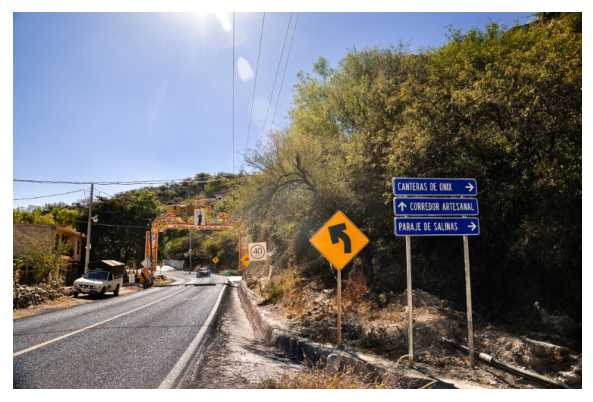

In [2]:
y_path0 = "G:/Repos/GT/CS6476/ps02/input_images/challenge_images/img-5-a-1.png"
y_path1 = "G:/Repos/GT/CS6476/ps02/input_images/challenge_images/img-5-a-2.png"
y_path2 = "G:/Repos/GT/CS6476/ps02/input_images/challenge_images/img-5-a-3.png"

img0 = cv2.imread(y_path0)
img1 = cv2.imread(y_path1)
img2 = cv2.imread(y_path2)


ims(bgr2rgb(img0))



In [ ]:
img = img0.copy()

lower = np.array([15, 150, 150])
upper = np.array([25, 255, 255])
# blur = cv2.GaussianBlur(img, (7,7), 0)
blur = cv2.medianBlur(img, 5)
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower, upper)
edges = cv2.Canny(mask, 50, 200)
hlines = cv2.HoughLinesP(edges, 1, np.pi / 180, 36, minLineLength=15, maxLineGap=2)

for ii in range(len(hlines)):
    for x0, y0, x1, y1 in hlines[ii]:
        cv2.line(img, (x0, y0), (x1, y1), (0, 0, 255), 3)
        
# mims([bgr2rgb(img), mask, edges])
ims(bgr2rgb(img))

print(len(hlines))


(380, 499)


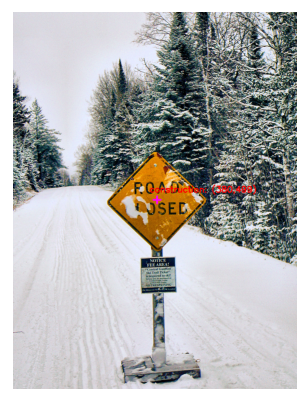

In [6]:
img = img2.copy()

coords = construction_sign_detection_challenge(img)
center = (int(coords[0]), int(coords[-1]))

print(center)

center_align = tuple([ii-20 for ii in center])
cv2.drawMarker(img, center, (255, 0, 255), markerType=cv2.MARKER_CROSS, markerSize=20, thickness=3)    
cv2.putText(img, "construction: ({},{})".format(*center), center_align, cv2.FONT_HERSHEY_SIMPLEX, .75, (0, 0, 255), 2)
out_path = "G:/Repos/GT/CS6476/ps02/output/ps2-5-a-3.png"
cv2.imwrite(out_path, img)
ims(bgr2rgb(img))




# all_verts = [(429, 262), (469, 302), (390, 302), (430, 342)]
# for x, y in all_verts:
#     cv2.drawMarker(img, (x, y), (255, 0, 255), markerType=cv2.MARKER_CROSS, markerSize=25, thickness=3)

    
# x_verts, y_verts = zip(*list(set(all_verts)))
# center = (np.mean(x_verts), np.mean(y_verts))    
# print("center: {}".format(center))
# cv2.drawMarker(img, (int(center[0]), int(center[1])), (255, 0, 255), markerType=cv2.MARKER_CROSS, markerSize=25, thickness=3)    
    
    

In [ ]:
center

In [ ]:
coords

In [ ]:
img.shape

In [ ]:
len(hlines)

In [ ]:
lower = np.array([0, 50, 50])  # red filter.
upper= np.array([10, 255, 255])
blur = cv2.GaussianBlur(img, (7, 7), 0)
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower, upper)
edges = cv2.Canny(mask, 50, 200)
hlines = cv2.HoughLinesP(edges, 1, np.pi / 180, 5, minLineLength=10, maxLineGap=1)
circles = cv2.HoughCircles(
    mask, cv2.HOUGH_GRADIENT, 1, minDist=50, param1=30, param2=15,
    minRadius=20, maxRadius=100
    )

for ii in circles[0,:]:
    cv2.circle(img, (int(ii[0]),int(ii[1])),int(ii[2]), (255,255,0), 2)
    cv2.circle(img, (int(ii[0]),int(ii[1])), 2, (255,0,255), 3)


# coords = stop_sign_detection(img)
# img_out = mark_traffic_signs(img, coords)

print("coords: {}".format(coords))
ims(bgr2rgb(img))

In [ ]:
lower = np.array([5, 100, 100])
upper = np.array([25, 255, 255])
blur = cv2.medianBlur(img, 5)
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower, upper)
edges = cv2.Canny(mask, 50, 200)
hlines = cv2.HoughLinesP(edges, 1, np.pi / 180, 75, minLineLength=50, maxLineGap=50)







In [ ]:
len(hlines)

In [ ]:
# bilateralFilter then fed that into medianBlur 
#
#  fastNlMeansDenoisingColored
#

img = img1.copy()

kw = 51

# Bilateral filter followed by medianBlur. 
blur0 = cv2.bilateralFilter(img, kw , kw*2.25, kw / 2.25)
blur1 = cv2.GaussianBlur(blur0, (7,7), 0)
blur2 = cv2.medianBlur(blur1, 5)



#  bgr2rgb(blur0), 
mims([bgr2rgb(img),bgr2rgb(blur1), bgr2rgb(blur2)])








